# Modelo de predicción extracción de oro.

## Introducción 

La empresa Zyfra esta buscando optimizar la producción de oro y eliminar los parámetros no rentables. 
Zyfra quiere predecir la cantidad de oro extraído del mineral de oro, nos comparte los datos de extracción y purificación. 

### Objetivos:

- Contruir un modelo para predecir la cantidad de extracción de oro. 
- Limpiar parametros para obtener una mejor rentabilidad.

## Importación de librerias

Para iniciar el desarrollo del analisis comenzaremos importando las librerias que nos funcionaran para la preparación de datos y construccion del modelo. 
Las librerias a descargas son pandas, Numpy, Seaborn y Skikit-Learn, permiten la lectura de datos, trabajar con base de datos, trazar modelos y construir modelos de machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression


## Carga de archivos

Ahora procedemos con la carga de las base de datos que nos proporcionan del almacen de datos. 
Se utiliza la función read_csv de pandas para la carga y como argumento la ubicación del archivo. 
Guardaremos los datos como sigue:

df_train = gold_recovery_train.csv

df_test = gold_recovery_test.csv

df_full = gold_recovery_full.csv

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## Exploración de datos

Ahora que hemos cargado los data sets es hora de validar los datos.
Examinaremos la información, llamaremos al atributo shape y a los métodos head, info y describe en los 3 data sets.

### Dataset Train

In [3]:
df_train.shape

(16860, 87)

In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


### Dataset de test

In [7]:
df_test.shape

(5856, 53)

In [8]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


### Dataset full

In [11]:
df_full.shape

(22716, 87)

In [12]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [13]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [14]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


Podemos observar que los datasets contienen 87 columnas en el dataset de entrenamiento, 53 en el de test y 87 en el dataset bruto. Sin embargo, es normal que suceda esto, el modelo se puede entrenar con las 87 columnas sin embargo, para las pruebas el modelo se puede adaptar a que el dataset solo contenga 53 columnas. 

En cuanto al tipo de datos, se observa que en los 3 datasets la columna date debe ser cambiada al tipo correcto, las columnas restantes son de tipo float por lo que no hay corrección. 
También se observa que hay datos ausentes, para este caso lo mejor es validar cuantos existen para saber si los iteramos con 0 o se eliminan. 

### Limpieza de datasets

In [15]:
## Validación de duplicados

list_datasets = [df_train, df_test, df_full]

df_train.name = 'Dataset train'
df_test.name = 'Dataset test'
df_full.name = 'Dataset full'

for i in list_datasets:
    duplicates = i.duplicated().sum()
    print ('Número de valores duplicados', i.name, ':', duplicates)

Número de valores duplicados Dataset train : 0
Número de valores duplicados Dataset test : 0
Número de valores duplicados Dataset full : 0


In [16]:
# Validación de valores ausentes train

missing_train = df_train.isnull().sum()
print(missing_train)

missin_max_train = missing_train.max()
print(missin_max_train)

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
2573


In [17]:
# Validación de valores ausentes test

missing_test = df_test.isnull().sum()
print(missing_test)

missin_max_test = missing_test.max()
print(missin_max_test)

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [18]:
# Validación de valores ausentes full

missing_full = df_full.isnull().sum()
print(missing_full)

missin_max_full = missing_full.max()
print(missin_max_full)

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64
3119


El porcentaje de datos ausentes por dataset es alrededor del 10% por lo que imputaremos los ausentes con el metodo interpolate() para estimar el valor de los datos ausentes basandose en la información por hora disponible. 

In [19]:
#Conversión de datatype de la columna date 
for df in [df_train, df_test, df_full]:
    df['date'] = pd.to_datetime(df['date'])  # Convierte la columna a datetime
    df.set_index('date', inplace=True)  # Usa 'date' como índice
    
print(df_train.index) 

DatetimeIndex(['2016-01-15 00:00:00', '2016-01-15 01:00:00',
               '2016-01-15 02:00:00', '2016-01-15 03:00:00',
               '2016-01-15 04:00:00', '2016-01-15 05:00:00',
               '2016-01-15 06:00:00', '2016-01-15 07:00:00',
               '2016-01-15 08:00:00', '2016-01-15 09:00:00',
               ...
               '2018-08-18 01:59:59', '2018-08-18 02:59:59',
               '2018-08-18 03:59:59', '2018-08-18 04:59:59',
               '2018-08-18 05:59:59', '2018-08-18 06:59:59',
               '2018-08-18 07:59:59', '2018-08-18 08:59:59',
               '2018-08-18 09:59:59', '2018-08-18 10:59:59'],
              dtype='datetime64[ns]', name='date', length=16860, freq=None)


In [34]:
#Imputación de datos ausentes con interpolación mediante el indice de fecha
for df in [df_train, df_test, df_full]:
    df.interpolate(method='time', axis=0, limit=None, inplace=True, limit_direction='both')

In [21]:
missing_train2 = df_train.isnull().sum()
print(missing_train2)

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64


In [22]:
missing_test2 = df_test.isnull().sum()
print(missing_test2)

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [23]:
missing_full2 = df_full.isnull().sum()
print(missing_full2)

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64


Después de inputar los valores ausentes con la interpolación por fecha, podemos confirmar que no hay duplicados ni ausentes y el tipo de datos en todas las bases es correcto. 

## Comprobación de cálculo de recuperación. 

- Se solicita comprobar que el cálculo de la recuperación sea correcto. 
- Se requiere calcular la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. 
- Encuentrar el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

Se esta solicitando cálcular la recuperación de la caracteristica rougher.output.recovery. 
De acuerdo con la información proporcionada, tenemos que simular el proceso de recuperación del oro del mineral de oro utilizando la fórmula Recuperación = C x (F - T) / F x (C - T) X 100 donde:

C: Es la proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final).

F: la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final).

T: la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final).

Asignaremos las columnas correspondientes a las variables adecuadas para poder realizar la fórmula de recuperación.
Posteriormente por medio de una función donde los paramatros asignados serán y, y_pred que posteriormente llenaremos como y = el recovery rougher del data frame e y_pred = el cálculo que hicimos de recuperación. 
Al final necesitamos comprobar que la columna contenga los valores correctos y el valor del MAE seá 0.

In [24]:
# Rougher:
Cr = df_train['rougher.output.concentrate_au']
Fr = df_train['rougher.input.feed_au']
Tr = df_train['rougher.output.tail_au']
recovery_rougher = df_train['rougher.output.recovery']

# Final:
Cf = df_train['final.output.concentrate_au']
Ff = df_train['rougher.input.feed_au']
Tf = df_train['final.output.tail_au']
recovery_final = df_train['final.output.recovery']

calculated_recovery_rougher = 100 * (Cr * (Fr - Tr)) / ( Fr * (Cr - Tr))

def mean_absolute_error(y, y_pred):

  diff = y - y_pred

  return np.nansum(abs(diff)) / len(diff)

print(mean_absolute_error(recovery_rougher, calculated_recovery_rougher))

inf


In [25]:
print(df_train[['rougher.output.recovery']].head(10))
print(calculated_recovery_rougher.head(10))


                     rougher.output.recovery
date                                        
2016-01-15 00:00:00                87.107763
2016-01-15 01:00:00                86.843261
2016-01-15 02:00:00                86.842308
2016-01-15 03:00:00                87.226430
2016-01-15 04:00:00                86.688794
2016-01-15 05:00:00                88.156912
2016-01-15 06:00:00                88.168065
2016-01-15 07:00:00                87.668336
2016-01-15 08:00:00                87.035862
2016-01-15 09:00:00                87.650868
date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
2016-01-15 05:00:00    88.156912
2016-01-15 06:00:00    88.168065
2016-01-15 07:00:00    87.668336
2016-01-15 08:00:00    87.035862
2016-01-15 09:00:00    87.650868
dtype: float64


Nuestro resultado de Error Medio Absoluto(MAE) es practicamente 0 lo que significa que es correcto el cálculo de recuperación en la etapa de rougher que tiene nuestro dataframe de entrenamiento. 
Hice una validación final imprimiendo las 10 primeras final de la columna 'rougher.output.recovery' y el resultado de nuestro cálculo y son practicamento los mismos.

## Características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

Como anteriormente observamos, el conjunto de test contiene menos columnas que el conjunto de train. Vamos a utilizar la función de set() para conocer cuales son las columnas faltantes en el data test e identificar cual es el tipo de estos.

In [26]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Podemos observar que los parametros faltantes en el dataset de train son las correspondientes a parámetros del producto de: flotación, purificación primaria, purificación secundaria y caracateristicas finales. 

Tampoco contiene las columnas de características de cálculo de rougher. 

## Preprocesamiento de datos

Ahora vamos a analizar que los datos que tenemos sean correctos, para esto vamos a realizar un preprocesamiento de datos, donde solo tomaremos una muestra del dataset ya que de esta forma el procesamiento es más rápido, es más facil poder encontrar errores y podemos asegurar que funciona correctamente. 

Para esto utilizaremos el método sample() que extrae una muestra del dataset, con los siguientes parametros:

frac=0.01 → Indica que se tomará el 1% de las filas del DataFrame original.

replace=False → Significa que la muestra se toma sin reemplazo (no se repiten filas).

random_state=random_state → Asegura que la muestra sea la misma cada vez que se ejecute el código.

In [27]:
df_train.shape
random_state = 1234

df_train_sample = df_train.sample(frac = 0.5,
                          replace = False,
                          random_state = random_state)

data = df_train_sample

print(f"""
original sample size: {len(df_train)}
sampled sample size: {len(df_train_sample)}
""")


original sample size: 16860
sampled sample size: 8430



In [28]:
#final.output.recovery
#rougher.output.recovery

# Tenemos dos variables de target.
target_columns = ["rougher.output.recovery", "final.output.recovery"]
features_exclude = target_columns.copy()

feature_columns = [f for f in data.columns if f not in features_exclude]

x_train, x_test, y_train, y_test = train_test_split(data[feature_columns],
                                                   data[target_columns],
                                                   test_size=0.20,
                                                   random_state=1234)

# Verifica los tamaños de los sets de entrenamiento
print(f"Tamaño de x_train: {x_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")


Tamaño de x_train: (6744, 84)
Tamaño de y_train: (6744, 2)


## Análisis de datos

### Concentración de metales (Au, Ag, Pb) 

Ahora que tenemos la muestra del dataset vamos a analizar como estan conformados los datos. 
Nos piden observar cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

Las variables a utilizas son las siguientes, de acuerdo a la nomenclatura compartida: 

primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_au 


final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_au


rougher.output.concentrate_ag 
rougher.output.concentrate_pb
rougher.output.concentrate_au 

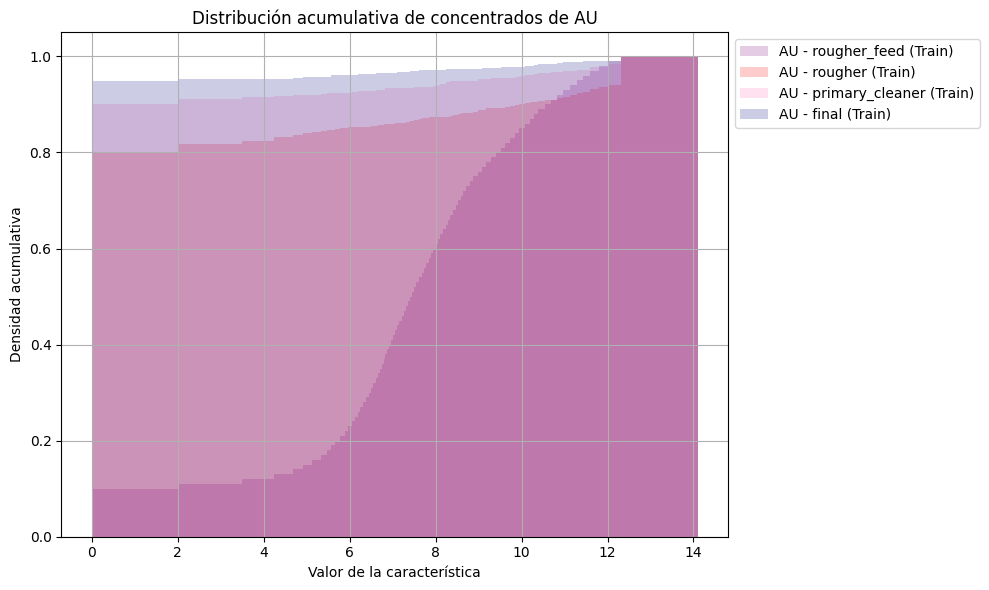

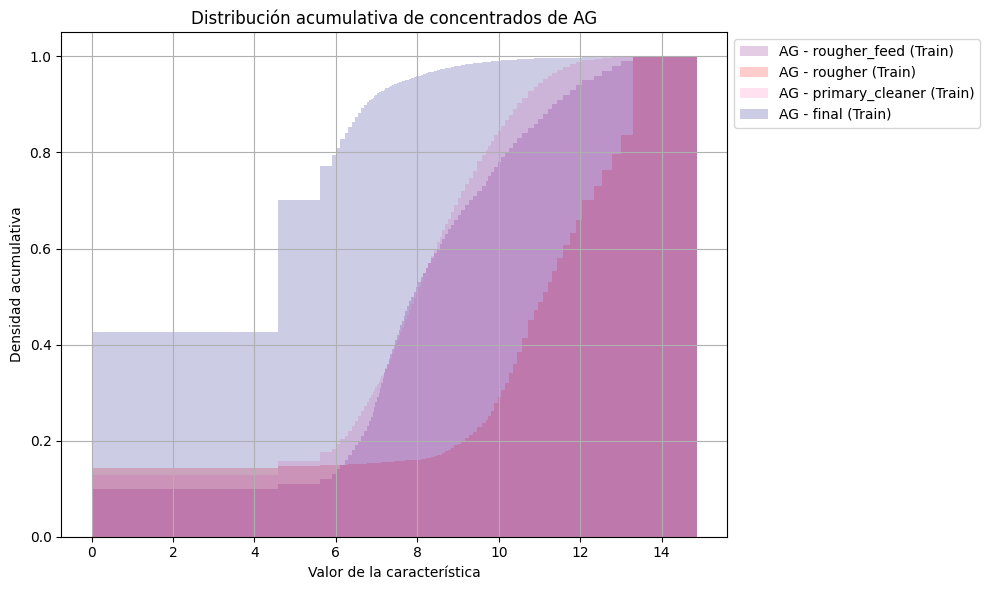

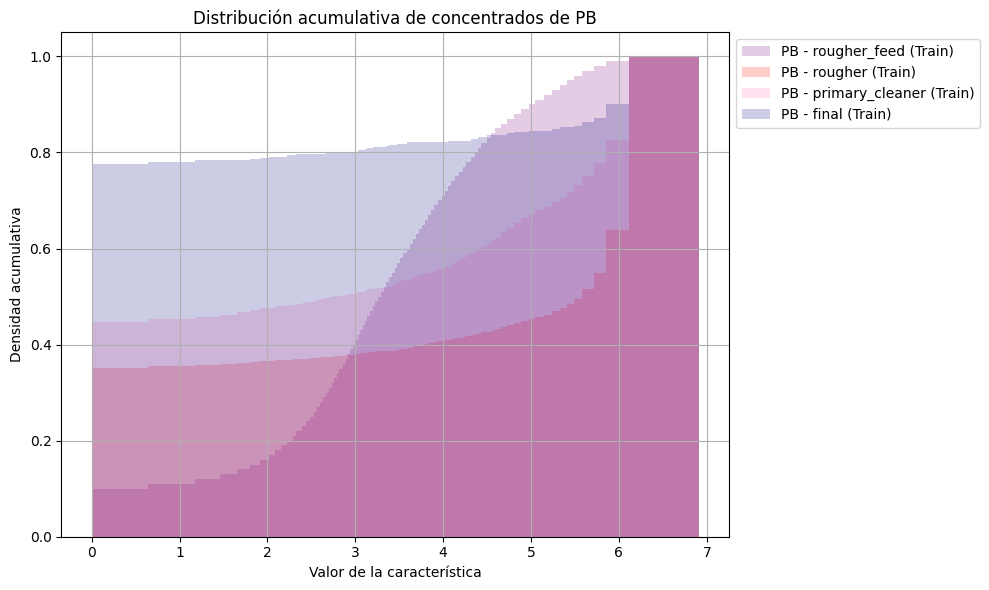

In [29]:
# Definir las características por metal
features_for_metal = {
    'au': [
        "rougher.input.feed_au",
        "rougher.output.concentrate_au", 
        "primary_cleaner.output.concentrate_au", 
        "final.output.concentrate_au"
    ],
    'ag': [
        "rougher.input.feed_ag",
        "rougher.output.concentrate_ag", 
        "primary_cleaner.output.concentrate_ag", 
        "final.output.concentrate_ag"
    ],
    'pb': [
        "rougher.input.feed_pb",
        "rougher.output.concentrate_pb", 
        "primary_cleaner.output.concentrate_pb", 
        "final.output.concentrate_pb"
    ]
}

# Colores específicos para cada etapa
stage_colors = {
    'rougher': 'red', 
    'primary_cleaner': 'hotpink',
    'final': 'navy',
    'rougher_feed': 'purple'
}


for metal, features in features_for_metal.items():
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    # Inicializar las etiquetas para la leyenda
    legend_labels = {
        "rougher_feed": f'{metal.upper()} - Rougher Feed',
        'rougher': f'{metal.upper()} - Rougher',
        'primary_cleaner': f'{metal.upper()} - Primary Cleaner',
        'final': f'{metal.upper()} - Final'
    }

    # Obtener los bins para la interpolación
    _, bins = pd.qcut(x_train[features[0]], q=100, retbins=True, duplicates="drop")

    # Graficar para cada etapa
    for f in features:
        # Extraer la etapa correctamente
        if "feed" in f:
            etapa = "rougher_feed"
        elif "rougher" in f:
            etapa = "rougher"
        elif "primary_cleaner" in f:
            etapa = "primary_cleaner"
        elif "final" in f:
            etapa = "final"
        
        color = stage_colors[etapa]  # Asignar color basado en la etapa
        
        # Graficar el histograma para train y test
        plt.hist(x_train[f], bins=bins, alpha=0.2, label=f'{metal.upper()} - {etapa} (Train)', cumulative=True, density=True, color=color)
        
    # Configuración del gráfico
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda fuera del gráfico
    plt.title(f"Distribución acumulativa de concentrados de {metal.upper()}")
    plt.xlabel("Valor de la característica")
    plt.ylabel("Densidad acumulativa")
    plt.grid()
    plt.tight_layout()  # Asegura que todo el contenido sea visible
    plt.show()


Tenemos las siguientes observaciones:

Para el Oro(Ag) observamos que hay una aumento en concetrado de cada etapa cada etapa, en cuanto a la distribución de train y test se puede ser ver que tienen comportamientos similares.

En el caso de la concetración de Plata(Ag) se observa que existe una leve disminución, ya que al principio del proceso se registar un valor de 17.5 puntos y en la información final no excede de los 8. Las distribuciones de Train y Test son bastante cercanas, lo cual es bueno.

Finalmente para el plomo(Pb) observa un compartamiento diferente a los 2 metales anteriores, ya que en la etapa primaria se registra un aumento de casi 4 puntos, sin embargo para la etapa final se registra una disminución de 1 punto, lo cual indica perdida durante el proceso. Las distribuciones de nuestra muestra son similares.

### Distribuciones del tamaño de las partículas de la alimentación 

Como siguiente paso se requiere comparar las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. 
Se debe considerar que si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

Las columnas que nos muestran la información del tamaño de las particulas son las siguientes:
"rougher.input.feed_size" en la etapa rougher, "primary_cleaner.input.feed_size" en la purificación primaria. 

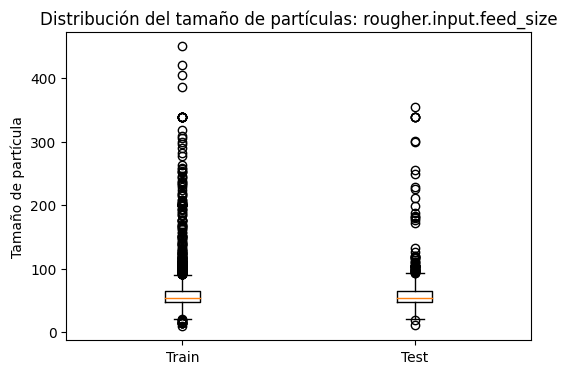

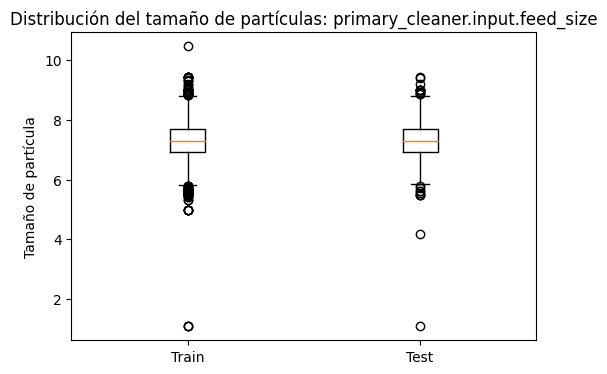

In [30]:
features_to_analyze = ["rougher.input.feed_size", "primary_cleaner.input.feed_size"]

for f in features_to_analyze:
    plt.figure(figsize=(6,4))
    plt.boxplot([x_train[f], x_test[f]], labels=["Train", "Test"])
    plt.title(f"Distribución del tamaño de partículas: {f}")
    plt.ylabel("Tamaño de partícula")
    plt.show()


En el caso de la distribución de las particulas en la etapa de flotación observamos lo siguiente:

    - El rango de tamaños de partículas en ambos conjuntos de datos (Train y Test) está entre 0 y 350.
    - Ambos tiene una media de 50. 
    
Caso similar ocurre en la etapa de purificación primaria, en donde:
       
    - El tamaño de las cajas es similar. 
    - La media se encuentra al rededor de 7.
    - Los valores van de 2 y 9. 
    
Esto indica que los conjuntos de datos están bien balanceados. Esto es ideal para entrenar un modelo, ya que podrá generalizar bien a nuevos datos.


### Distribuciones de concentraciones totales.

Ahora observaremos la distribuciones de las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. 

El objetivo es observar algún valor anormal en la distribución total. Si es así, nos debemos plantear si merece la pena eliminar esos valores de ambas muestras y posteriormente describir los resultados y eliminar las anomalías.

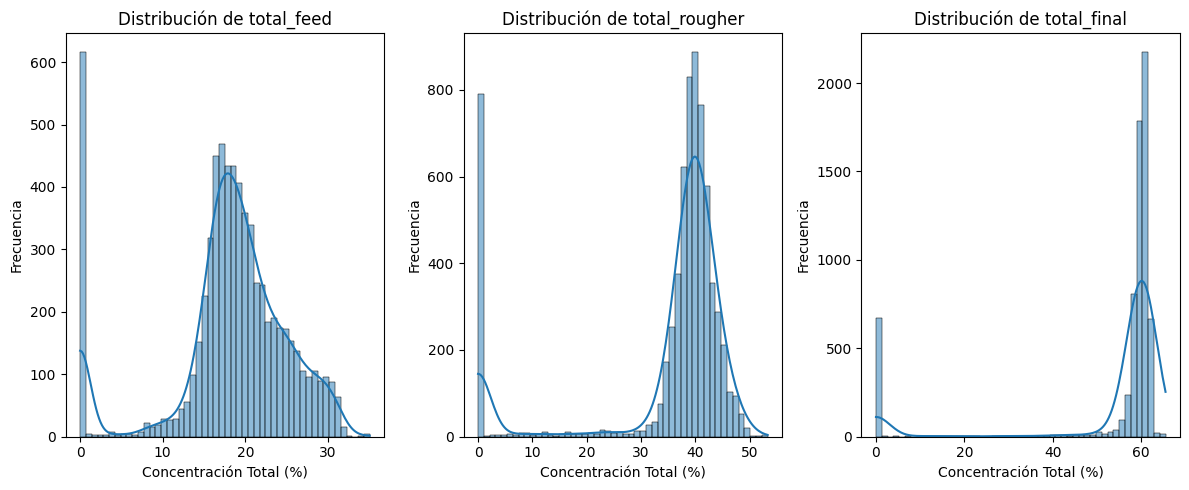

Filas eliminadas: 883


In [31]:
# calculo de la concentración total en cada etapa
x_train["total_feed"] = x_train["rougher.input.feed_au"] + x_train["rougher.input.feed_ag"] + x_train["rougher.input.feed_pb"]
x_train["total_rougher"] = x_train["rougher.output.concentrate_au"] + x_train["rougher.output.concentrate_ag"] + x_train["rougher.output.concentrate_pb"]
x_train["total_final"] = x_train["final.output.concentrate_au"] + x_train["final.output.concentrate_ag"] + x_train["final.output.concentrate_pb"]

# grafica de la distribución de concentraciones totales
plt.figure(figsize=(12, 5))

# graficar cada etapa en un subplot diferente
for i, column in enumerate(["total_feed", "total_rougher", "total_final"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(x_train[column], bins=50, kde=True)
    plt.title(f"Distribución de {column}")
    plt.xlabel("Concentración Total (%)")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# eliminar valores anómalos (concentraciones totales menores a 0.1)
# filtro usando un umbral de 0.1 ya que es un valor razonable basado en la química del proceso
x_train_clean = x_train[
    (x_train["total_feed"] >= 0.1) &
    (x_train["total_rougher"] >= 0.1) &
    (x_train["total_final"] >= 0.1)
]

# mostrar cuántas filas quedan después de limpiar los datos
filas_eliminadas = x_train.shape[0] - x_train_clean.shape[0]
print("Filas eliminadas:", filas_eliminadas)


Podemos observar que en el total de concentraciones existen valores anomalos evidentes, son valores extremos por lo que se eliminaran.

## Construcción del modelo.

### Valor final de sMAPE

En esta parte del analisis construiremos una función para cálcular sMAPE, que una métrica utilizada para evaluar la precisión de un modelo de predicción, especialmente en problemas de series temporales o regresión.

In [32]:
def smape_(y, y_pred, **kwargs):

  n = len(y)
  abs_y = abs(y)
  abs_y_pred = abs(y_pred)
  abs_diff = abs(y - y_pred)

  return 100*(2/n) * np.nansum(abs_diff / (abs_y + abs_y_pred))


def smape_final(y, y_pred):

  pred_target_1 = y_pred[:, 0]
  pred_target_2 = y_pred[:, 1]

  rougher_smape = smape_(y.iloc[:, 0], pred_target_1)
  final_smape = smape_(y.iloc[:, 1], pred_target_2)

  return 0.25*rougher_smape + 0.75*final_smape

#Definimos valor para la validación cruzada
smape_scorer = make_scorer(smape_final, greater_is_better=False)

### Entrenamiento de diferentes modelos. 

Evaluaremos mediante la validación cruzada cuál es el mejor modelo utilizando la muestra de prueba. 

In [33]:
# asegurar que solo haya valores numéricos y eliminar valores nulos
x_train = x_train.select_dtypes(include=[np.number]).dropna()
y_train = y_train.loc[x_train.index]

# Selección de modelos
models = [LinearRegression(), 
          RandomForestRegressor(),
          RandomForestRegressor(n_estimators=100, max_depth=20), 
          RandomForestRegressor(n_estimators=50, max_depth=10),
          RandomForestRegressor(n_estimators=100, max_depth=5)]

for model in models:
    print(f"Evaluando modelo: {model.__class__.__name__}")
    
    # Evaluación usando la muestra de entrenamiento y validación cruzada
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring=smape_scorer)
    
    # Mostrar el sMAPE promedio (invirtiendo el signo para que un valor más bajo sea mejor)
    print(f"sMAPE promedio: {-scores.mean()}")


Evaluando modelo: LinearRegression
sMAPE promedio: 12.457379874738823
Evaluando modelo: RandomForestRegressor
sMAPE promedio: 6.15698763102054
Evaluando modelo: RandomForestRegressor
sMAPE promedio: 6.150116392627721
Evaluando modelo: RandomForestRegressor
sMAPE promedio: 7.85910885867477
Evaluando modelo: RandomForestRegressor
sMAPE promedio: 12.323156691026329


El modelo RandomForestRegressor tiene un rendimiento mejor que el LinearRegression.
Encontramos que los modelos tienen un sMAPE promedio más bajo. Esto significa que las predicciones hechas por el Random Forest son más precisas, en promedio, que las del modelo de regresión lineal.
En este caso la mejor opción es RandomForestRegressor(n_estimators=100, max_depth=20)

# Conclusiones

Procesamiento de datos:
Se realizo la limpieza de los 3 datasets train, test y full. Se encontraron valores ausentes, los cuales fueron eliminados para ingresar información falsa. Se detecto que el tipo de datos de la fecha estaba de forma correcta y se realizo la conversión. Se identifico que el dataset de test no contenia información de cálculos rougher, y algunas otras caracteristicas del producto, sin embargo, no afecto el entrenamiento del modelo. 

Prepocesamiento de datos:
Se trabajo con el dataset de train, se extrajo una muestra para que el proceso fuera más rapido y preciso. 

Calculo de recuperación:
Se realizo un cálculo para validar que el cálculo de recuperación fuera correcto, no se encontraron diferencias por lo que la información en el dataset de entrenamiento es correcta.

Distribución de caracteristicas:
Se evaluaron las distribuciones de los metales en sus diferentes etapas de purificación y resultado final, la información era coherente.

Contrucción del modelo:
Para la construcción del modelo se realizo una función para determinar el sMAPE el cual nos ayudo a evaluar el modelo de entrenamiento más adecuado, en este caso fue RandomForestRegressor con una puntuación de 2.581.